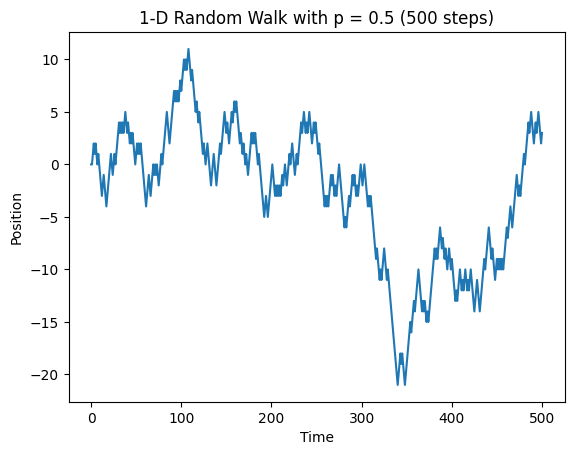

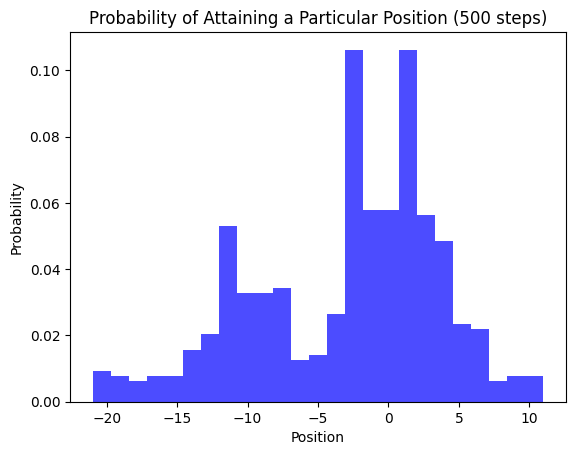

Simulated Probability =  0.502


In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
p = 0.5
num_steps = 500

positions = np.zeros(num_steps)  # Initialize
num_right_moves=0
for i in range(1, num_steps):
    flip = np.random.rand()
    # Figure out Direction
    if flip < p:
        step = -1  #'left'.
    else:
        step = 1  #'right'.
        num_right_moves+=1
    positions[i] = positions[i-1] + step

# Plot the results
plt.plot(range(num_steps+1), np.concatenate(([0], positions)))
plt.xlabel('Time')
plt.ylabel('Position')
plt.title(f'1-D Random Walk with p = {p} (500 steps)')
plt.show()

# Plot a histogram of positions
# plt.hist(positions, bins=30, density=True, alpha=0.7, color='b')
plt.hist(positions, bins=25, density=True, alpha=0.7, color='b')
plt.xlabel('Position')
plt.ylabel('Probability')
plt.title(f'Probability of Attaining a Particular Position (500 steps)')
plt.show()

print("Simulated Probability = ",num_right_moves/500)


Since the p_b = 0.8, this implies that we've got a higher chance of moving towards the right.

Said another way, this in turn implies that the threshold that we use to classify the "left" & the "right" decisions must reduce to 0.2 - meaning that we classify a decision as moving to the "right" as soon as we exceed the threshold of 0.2.

Clearly, this results in a higher probability of moving towards the right - that is, increasing the position with time.

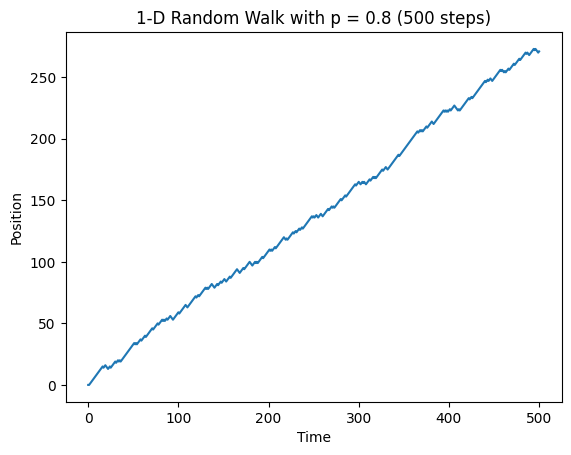

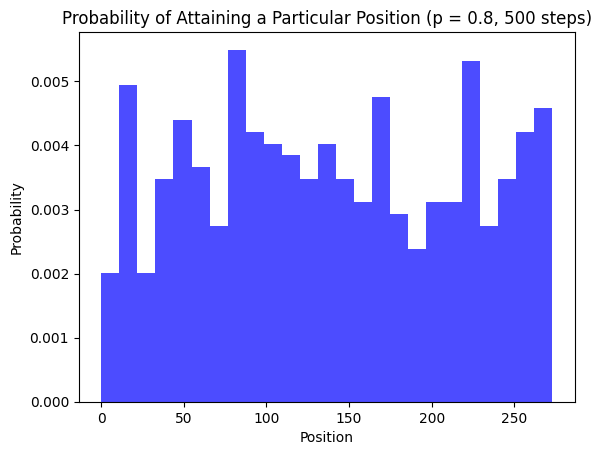

Simulated Probability =  0.77


In [53]:
p_b=0.8


positions_b = np.zeros(num_steps) 
num_right_moves=0
for i in range(1, num_steps):
    flip = np.random.rand()
    if flip < (1-p_b):
        step = -1
    else:
        step = 1
        num_right_moves+=1
    positions_b[i] = positions_b[i-1] + step

# Plot the results for part (b)
plt.plot(range(num_steps+1), np.concatenate(([0], positions_b)))
plt.xlabel('Time')
plt.ylabel('Position')
plt.title(f'1-D Random Walk with p = {p_b} (500 steps)')
plt.show()

# Plot a histogram of positions for part (b)
# plt.hist(positions_b, bins=30, density=True, alpha=0.7, color='b')
plt.hist(positions_b, bins=25, density=True, alpha=0.7, color='b')
plt.xlabel('Position')
plt.ylabel('Probability')
plt.title(f'Probability of Attaining a Particular Position (p = {p_b}, 500 steps)')
plt.show()

print("Simulated Probability = ",num_right_moves/500)

Simulated Probability Current Iter  0  =  0.784
Simulated Probability Current Iter  1  =  0.774
Simulated Probability Current Iter  2  =  0.804
Simulated Probability Current Iter  3  =  0.812
Simulated Probability Current Iter  4  =  0.808
Simulated Probability Current Iter  5  =  0.802
Simulated Probability Current Iter  6  =  0.79
Simulated Probability Current Iter  7  =  0.804
Simulated Probability Current Iter  8  =  0.77
Simulated Probability Current Iter  9  =  0.792
Simulated Probability Current Iter  10  =  0.77
Simulated Probability Current Iter  11  =  0.802
Simulated Probability Current Iter  12  =  0.772
Simulated Probability Current Iter  13  =  0.806
Simulated Probability Current Iter  14  =  0.822
Simulated Probability Current Iter  15  =  0.804
Simulated Probability Current Iter  16  =  0.782
Simulated Probability Current Iter  17  =  0.796
Simulated Probability Current Iter  18  =  0.824
Simulated Probability Current Iter  19  =  0.824
Simulated Probability Current Ite

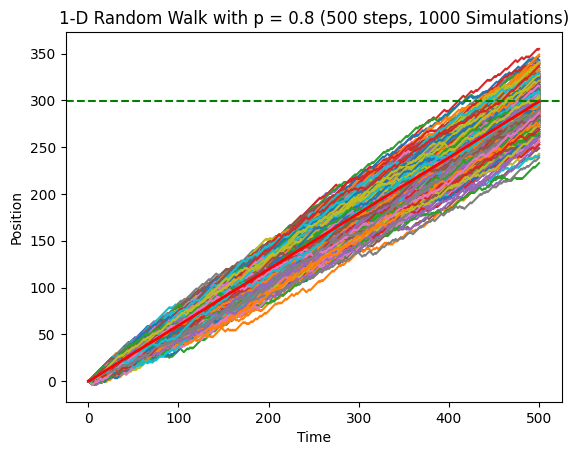

/tmp/ipykernel_32/2494410036.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab10')


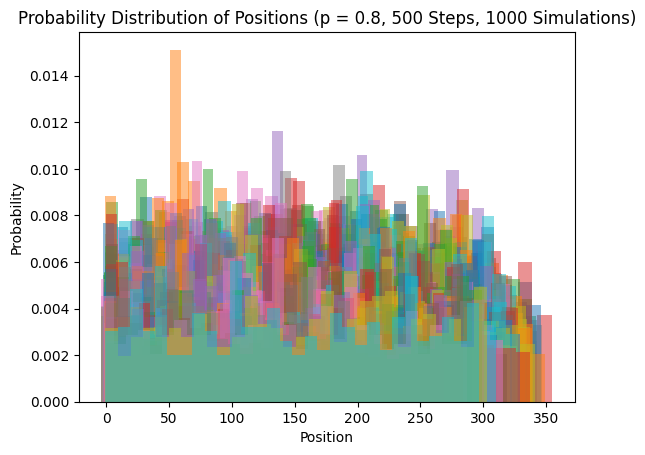

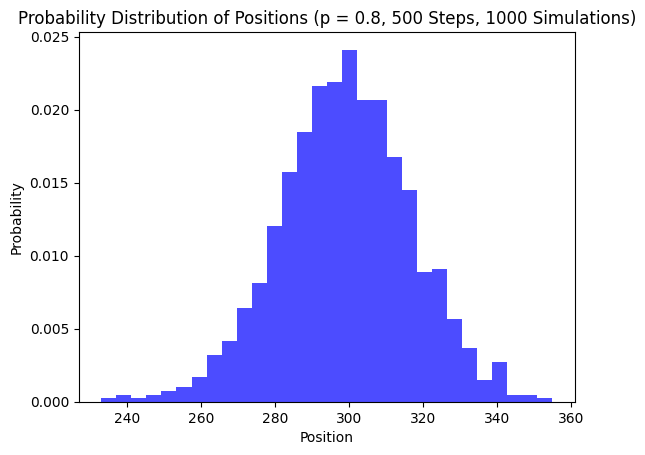

In [54]:
num_simulations=1000

positions_c = np.zeros((num_simulations, num_steps))
simul_prob_list=[]
for i in range(num_simulations):
    num_right_moves=0
    for j in range(1, num_steps):
        flip = np.random.rand()
        if flip < (1-p_b):
            step = -1
        else:
            step = 1
            num_right_moves+=1
        positions_c[i, j] = positions_c[i, j-1] + step
    
    Simulated_prob=num_right_moves/500
    print("Simulated Probability Current Iter ",i," = ",Simulated_prob)
    simul_prob_list.append(Simulated_prob)
    
# Calculate the average position at each time step
average_positions = np.mean(positions_c, axis=0)
    
final_simul_prob=sum(simul_prob_list) / len(simul_prob_list)
print("Final Simulated Probability = ",final_simul_prob)

# Plot the results for part (b)
for i in range(num_simulations):
    plt.plot(range(num_steps+1), np.concatenate(([0], positions_c[i])))
    
# Plot the average line
plt.plot(range(num_steps+1), np.concatenate(([0], average_positions)), color='red', label='Average', linewidth=2)
# Draw a horizontal line from the end of the average line to the y-axis
plt.axhline(average_positions[-1], color='green', linestyle='--', label='Average Value')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title(f'1-D Random Walk with p = {p_b} (500 steps, 1000 Simulations)')
plt.show()


from matplotlib.cm import get_cmap
# Create a colormap
cmap = get_cmap('tab10')
# Plot histograms for each simulation
for i in range(num_simulations):
#     plt.hist(positions_c[i], bins=30, density=True, alpha=0.5, color='b')
    color = cmap(i % 10)  # Use modulo 10 to cycle through colors if there are more than 10 simulations
    plt.hist(positions_c[i], bins=30, density=True, alpha=0.5, color=color)


plt.xlabel('Position')
plt.ylabel('Probability')
plt.title(f'Probability Distribution of Positions (p = {p_b}, 500 Steps, 1000 Simulations)')
plt.show()

# Plot a histogram of positions for part (b)
# plt.hist(positions_c[:, -1], bins=30, density=True, alpha=0.7, color='b')
plt.hist(positions_c[:, -1], bins=30, density=True, alpha=0.7, color='b')
# plt.hist(positions_c[-1], bins=30, density=True, alpha=0.7, color='b')
plt.xlabel('Position')
plt.ylabel('Probability')
plt.title(f'Probability Distribution of Positions (p = {p_b}, 500 Steps, 1000 Simulations)')
plt.show()

# KDE Trial Plot
# import seaborn as sns

# # Flatten the positions for KDE
# positions_flat = positions_c.flatten()

# # Create KDE plot
# sns.kdeplot(positions_flat, color='b', fill=True)

# plt.xlabel('Position')
# plt.ylabel('Probability Density')
# plt.title(f'Kernel Density Estimation of Positions (p = {p_b}, 500 Steps, 1000 Simulations)')
# plt.show()

If we do the same experiment for 100000 simulations, instead of 1000 simulatons, we'd be able to analyze & view the 1-D Random Walk even better.

All we'd have to do is to adjust the integral value of 'num_simulations', & set it equal to 100000.

In [55]:
# # Define parameters for part (c)
# num_simulations = 100000

# # Make a new position vector. This will include all simulations.
# positions_c = np.zeros((num_simulations, num_steps))

# # Simulate the random walk 1000 times
# for i in range(num_simulations):
#     positions_c[i] = np.cumsum(np.random.choice([-1, 1], size=num_steps, p=[1-p_b, p_b]))

# # Plot a histogram of positions for part (b)
# # plt.hist(positions_c[:, -1], bins=30, density=True, alpha=0.7, color='b')
# plt.hist(positions_c[:, -1], bins=30, density=True, alpha=0.7, color='b')
# # plt.hist(positions_c[-1], bins=30, density=True, alpha=0.7, color='b')
# plt.xlabel('Position')
# plt.ylabel('Probability')
# plt.title(f'Probability Distribution of Positions (p = {p_b}, 500 Steps, 1000 Simulations)')
# plt.show()

# positions_c = np.zeros((num_simulations, num_steps))
# for i in range(num_simulations):
#     # Loop through each time step.
#     for j in range(1, num_steps):
#         # Flip a coin.
#         flip = np.random.rand()
        
#         # Figure out which way we should step.
#         if flip < (1-p_b):
#             step = -1  # To the 'left'.
#         else:
#             step = 1  # to the 'right'.
            
#         # Update our position based off of where we were in the last time point. 
#         positions_c[i, j] = positions_c[i, j-1] + step

# # Plot a histogram of positions for part (b)
# # plt.hist(positions_c[:, -1], bins=30, density=True, alpha=0.7, color='b')
# plt.hist(positions_c[:, -1], bins=30, density=True, alpha=0.7, color='b')
# # plt.hist(positions_c[-1], bins=30, density=True, alpha=0.7, color='b')
# plt.xlabel('Position')
# plt.ylabel('Probability')
# plt.title(f'Probability Distribution of Positions (p = {p_b}, 500 Steps, 1000 Simulations)')
# plt.show()
